Студент: Баширов Роман

Группа: J4241

Задача 2. Графическое решение DEA.

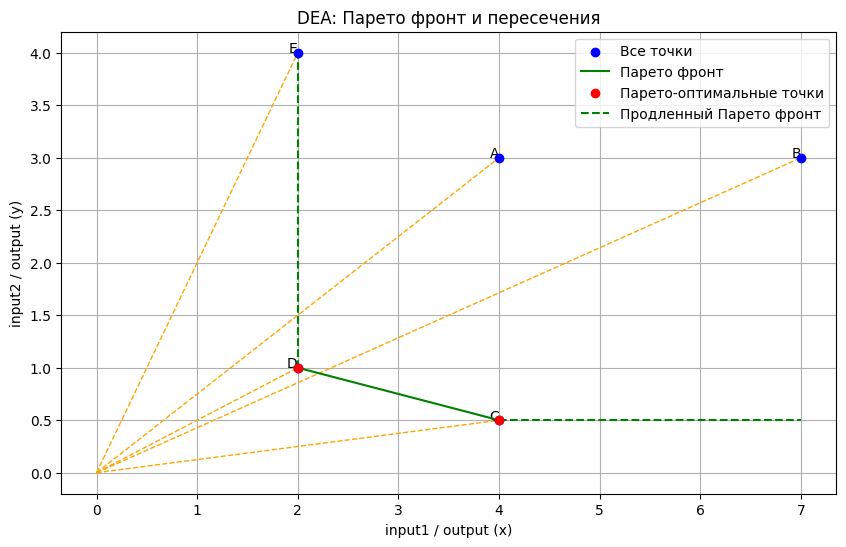

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
data = {
    "A": {"input1": 4, "input2": 3, "output": 1},
    "B": {"input1": 7, "input2": 3, "output": 1},
    "C": {"input1": 8, "input2": 1, "output": 2},
    "D": {"input1": 4, "input2": 2, "output": 2},
    "E": {"input1": 2, "input2": 4, "output": 1},
}

# Рассчитаем координаты x и y
points = {
    key: (
        value["input1"] / value["output"],
        value["input2"] / value["output"]
    )
    for key, value in data.items()
}

# Парето-оптимальные точки: минимизация x и y
sorted_points = sorted(points.items(), key=lambda item: (item[1][0], item[1][1]))
pareto_front = [sorted_points[0]]
for point in sorted_points[1:]:
    if point[1][1] < pareto_front[-1][1][1]:
        pareto_front.append(point)

# Функция для нахождения пересечения линии с Парето-фронтом
def find_intersection(pareto_front, point):
    px, py = point
    for i in range(len(pareto_front) - 1):
        x1, y1 = pareto_front[i][1]
        x2, y2 = pareto_front[i + 1][1]

        # Уравнение линии через (0,0) и (px, py): y = (py/px) * x
        slope = py / px

        # Найти пересечение с отрезком (x1, y1)-(x2, y2)
        if x1 != x2:
            line_slope = (y2 - y1) / (x2 - x1)
            if slope <= line_slope:
                intersect_x = (y1 - slope * x1) / (line_slope - slope)
                intersect_y = slope * intersect_x

                # Проверка, что точка пересечения лежит на отрезке Парето
                if x1 <= intersect_x <= x2 and y1 <= intersect_y <= y2:
                    return intersect_x, intersect_y

    return None

# График
plt.figure(figsize=(10, 6))
all_points = list(points.values())
pareto_points = [p[1] for p in pareto_front]

# Все точки
plt.scatter(*zip(*all_points), color="blue", label="Все точки", zorder=5)
for key, value in points.items():
    plt.text(value[0], value[1], key, fontsize=10, ha='right')

# Парето фронт
plt.plot(*zip(*pareto_points), color="green", label="Парето фронт", zorder=4)
plt.scatter(*zip(*pareto_points), color="red", label="Парето-оптимальные точки", zorder=6)

# Линии от (0,0) до всех точек и пересечения с Парето
for key, value in points.items():
    plt.plot([0, value[0]], [0, value[1]], linestyle="--", color="orange", lw=1)
    if key not in [p[0] for p in pareto_front]:
        intersection = find_intersection(pareto_front, value)
        if intersection:
            plt.scatter(*intersection, color="purple", label="Пересечение с Парето" if key == "B" else "", zorder=7)

# Продление Парето-фронта от D до (2, 4) и от C до (7, 0.5)
# Найдем точки D и C
point_D = points["D"]
point_C = points["C"]

# Добавим точки (2, 4) и (7, 0.5)
extended_points = [(2, 4), (7, 0.5)]

# Соединим точки D с (2, 4) и C с (7, 0.5)
plt.plot([point_D[0], 2], [point_D[1], 4], color="green", linestyle="--", label="Продленный Парето фронт", zorder=3)
plt.plot([point_C[0], 7], [point_C[1], 0.5], color="green", linestyle="--", zorder=3)

# Настройка графика
plt.xlabel("input1 / output (x)")
plt.ylabel("input2 / output (y)")
plt.title("DEA: Парето фронт и пересечения")
plt.legend()
plt.grid(True)
plt.show()

- D и С являются оптимальными, так как они лежат на Парето-фронте.
- Точка E не является оптимальной, так как ее отношение input2/output хуже, чем у D.

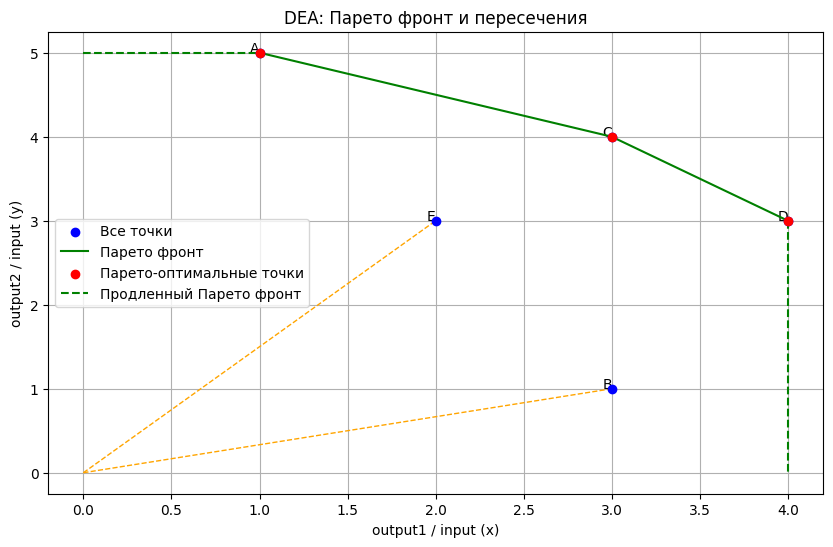

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
data = {
    "A": {"input": 1, "output1": 1, "output2": 5},
    "B": {"input": 2, "output1": 6, "output2": 2},
    "C": {"input": 1, "output1": 3, "output2": 4},
    "D": {"input": 1, "output1": 4, "output2": 3},
    "E": {"input": 2, "output1": 4, "output2": 6},
}

# Рассчитаем координаты x и y
points = {
    key: (
        value["output1"] / value["input"],
        value["output2"] / value["input"]
    )
    for key, value in data.items()
}

# Парето-оптимальные точки: максимизация x и y
sorted_points = sorted(points.items(), key=lambda item: (-item[1][0], -item[1][1]))
pareto_front = [sorted_points[0]]
for point in sorted_points[1:]:
    if point[1][1] > pareto_front[-1][1][1]:
        pareto_front.append(point)

# Функция для нахождения пересечения линии с Парето-фронтом
def find_intersection(pareto_front, point):
    px, py = point
    for i in range(len(pareto_front) - 1):
        x1, y1 = pareto_front[i][1]
        x2, y2 = pareto_front[i + 1][1]

        # Уравнение линии через (0,0) и (px, py): y = (py/px) * x
        # Найти пересечение с отрезком (x1, y1)-(x2, y2)
        if x1 <= px <= x2:
            slope = py / px
            intersect_x = px
            intersect_y = slope * intersect_x

            # Проверка, что точка пересечения лежит на отрезке Парето
            if y1 <= intersect_y <= y2:
                return intersect_x, intersect_y

    return None

# График
plt.figure(figsize=(10, 6))
all_points = list(points.values())
pareto_points = [p[1] for p in pareto_front]

# Все точки
plt.scatter(*zip(*all_points), color="blue", label="Все точки", zorder=5)
for key, value in points.items():
    plt.text(value[0], value[1], key, fontsize=10, ha='right')

# Парето фронт
plt.plot(*zip(*pareto_points), color="green", label="Парето фронт", zorder=4)
plt.scatter(*zip(*pareto_points), color="red", label="Парето-оптимальные точки", zorder=6)

# Линии от (0,0) до не оптимальных точек и пересечения с Парето
for key, value in points.items():
    if key not in [p[0] for p in pareto_front]:
        plt.plot([0, value[0]], [0, value[1]], linestyle="--", color="orange", lw=1)

# Продление Парето-фронта от A до (0, 5) и от D до (4, 0)
# Найдем точки A и D
point_A = points["A"]
point_D = points["D"]

# Добавим точки (0, 5) и (4, 0)
extended_points = [(0, 5), (4, 0)]

# Соединим точки A с (0, 5) и D с (4, 0)
plt.plot([0, point_A[0]], [5, point_A[1]], color="green", linestyle="--", label="Продленный Парето фронт", zorder=3)
plt.plot([point_D[0], 4], [point_D[1], 0], color="green", linestyle="--", zorder=3)

# Настройка графика
plt.xlabel("output1 / input (x)")
plt.ylabel("output2 / input (y)")
plt.title("DEA: Парето фронт и пересечения")
plt.legend()
plt.grid(True)
plt.show()

- A, C, D находятся на Парето-фронте.
- Точки B и E не находятся на Парето-фронте, так как их отношения output1/input и output2/input хуже, чем у точек A, C и D.